<a href="https://colab.research.google.com/github/Abinayak03/Deep-learning/blob/main/Final__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

**IMPORTING THE DATA**

In [ ]:
df=pd.read_csv("bang data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

 **DATA PREPROCESSING**

In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


**CHECK IF THERE IS ANY NULLL VALUES**

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

*Dropping the entire "society" column due to 5502 missing values, as the high percentage of null values makes it less reliable for analysis.*

In [ ]:
df1=df.drop(['society','area_type'],axis=1)

In [ ]:
df1["balcony"].value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [ ]:
df1.isnull().sum()

,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


*Replacing null values in the "balcony" column with 0, assuming that missing values indicate the absence of a balcony in the property.*

In [ ]:
df1["balcony"] = df1["balcony"].fillna(0)

*Dropping all remaining null values since their proportion in the dataset is
 minimal, ensuring data integrity without significant information loss.*




In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


Now, null values got cleared

In [ ]:
df1.isnull().sum()

,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df1.shape

(13246, 7)

*Converting the availability column into a binary format, where "Ready To Move" is represented as 1 (indicating immediate availability) and all other values (future possession dates) are set to 0, making it easier for analysis and modeling.*

In [ ]:
df1['availability'] = df1['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)


In [ ]:
df1.dtypes

,0
availability,int64
location,object
size,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df1.head(10)

,availability,location,size,total_sqft,bath,balcony,price
0,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,1,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,1,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,0,Old Airport Road,4 BHK,2732,4.0,0.0,204.00
7,1,Rajaji Nagar,4 BHK,3300,4.0,0.0,600.00
8,1,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,1,Gandhi Bazar,6 Bedroom,1020,6.0,0.0,370.00


*Extracting the numeric values from the "bedrooms" column using a regular expression (\d+), converting them to integers to ensure consistency for analysis and modeling.*

In [ ]:
df1 = df1.rename(columns={"size": "BHK"})

In [ ]:
df1["BHK"] = df1["BHK"].astype(str).str.extract(r'(\d+)').astype(int)

In [ ]:
df1.head()

,availability,location,BHK,total_sqft,bath,balcony,price
0,0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,1,Uttarahalli,3,1440,2.0,3.0,62.00
3,1,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,1,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Converting the total_sqft column into a numeric format by handling different formats of square footage values:

If the value is a range (e.g., "1200-1500"), it calculates the average of the two numbers.

If the value is a single number (e.g., "1200"), it converts it directly to a float.

If the conversion fails (e.g., due to non-numeric values), it returns None to handle missing or invalid entries gracefully.

This ensures that all values in total_sqft are in a consistent numerical format, making them suitable for analysis and modeling.

In [ ]:
def conversion(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df1['total_sqft']=df1['total_sqft'].apply(conversion)
df1.head(10)

,availability,location,BHK,total_sqft,bath,balcony,price
0,0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,1,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,1,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,1,Kothanur,2,1200.0,2.0,1.0,51.00
5,1,Whitefield,2,1170.0,2.0,1.0,38.00
6,0,Old Airport Road,4,2732.0,4.0,0.0,204.00
7,1,Rajaji Nagar,4,3300.0,4.0,0.0,600.00
8,1,Marathahalli,3,1310.0,3.0,1.0,63.25
9,1,Gandhi Bazar,6,1020.0,6.0,0.0,370.00


In [ ]:
df1[["bath","balcony"]] = df1[["bath","balcony"]].astype(int)

In [ ]:
df1.dtypes

,0
availability,int64
location,object
BHK,int64
total_sqft,float64
bath,int64
balcony,int64
price,float64


In [ ]:
df1.describe()

,availability,BHK,total_sqft,bath,balcony,price
count,13246.000000,13246.000000,13200.000000,13246.000000,13246.000000,13246.000000
mean,0.797524,2.801902,1555.302783,2.692586,1.520233,112.389392
std,0.401860,1.295758,1237.323445,1.341506,0.859301,149.076587
min,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,1.000000,3.000000,1275.000000,2.000000,2.000000,72.000000
75%,1.000000,3.000000,1672.000000,3.000000,2.000000,120.000000
max,1.000000,43.000000,52272.000000,40.000000,3.000000,3600.000000


In [ ]:
df1.loc[30]

,30
availability,0
location,Yelahanka
BHK,4
total_sqft,2475.0
bath,4
balcony,0
price,186.0


<ipython-input-184-e7a4f4101280>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['bath'], palette='Set2')
<ipython-input-184-e7a4f4101280>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['BHK'], palette='Set3')


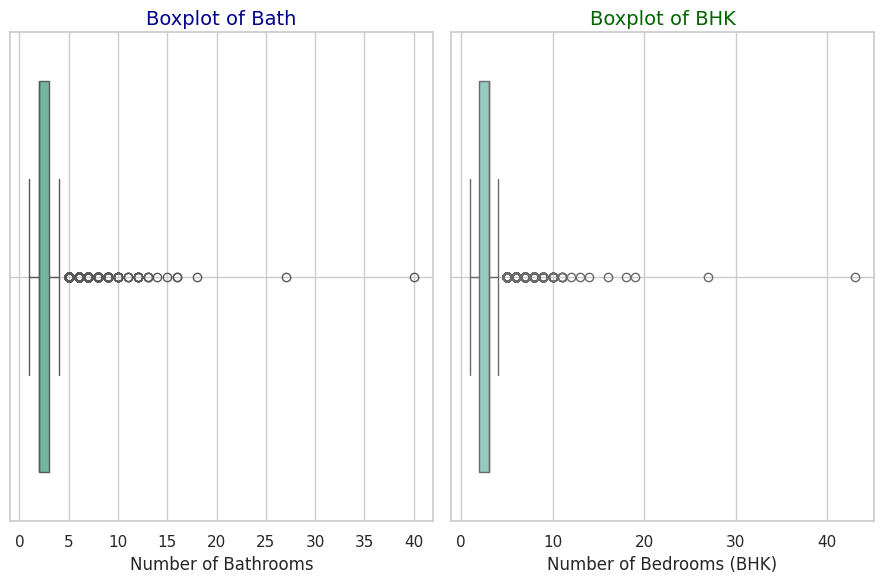

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a figure with two subplots in one row
plt.figure(figsize=(9, 6))

# Boxplot for 'bath'
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['bath'], palette='Set2')
plt.title('Boxplot of Bath', fontsize=14, color='darkblue')
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.grid(True)

# Boxplot for 'BHK'
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['BHK'], palette='Set3')
plt.title('Boxplot of BHK', fontsize=14, color='darkgreen')
plt.xlabel('Number of Bedrooms (BHK)', fontsize=12)
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


**REMOVING OUTLIERS**

*Removing outliers from the "bath" and "bedrooms" columns using the Interquartile Range (IQR) method, which filters out values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR, ensuring a cleaner dataset by eliminating extreme deviations.*

In [ ]:
df1['bath'].unique()

array([ 2,  5,  3,  4,  6,  1,  9,  8,  7, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

In [ ]:
df1["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df1[['bath','BHK']].quantile([0.25,0.80])

,bath,BHK
0.25,2.0,2.0
0.80,3.0,3.0


In [ ]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First Quartile (25th percentile)
    Q3 = df[column].quantile(0.90)  # Third Quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filtering to 'bath' and 'bedrooms' columns
df1 = remove_outliers_iqr(df1, "bath")
df1 = remove_outliers_iqr(df1, "BHK")


In [ ]:
df1.describe()

,availability,BHK,total_sqft,bath,balcony,price
count,13052.000000,13052.000000,13009.000000,13052.000000,13052.000000,13052.000000
mean,0.795204,2.713377,1540.528844,2.605808,1.525054,109.988729
std,0.403568,1.004653,1165.062435,1.068452,0.851237,141.832499
min,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,1.000000,3.000000,1274.000000,2.000000,2.000000,70.000000
75%,1.000000,3.000000,1665.000000,3.000000,2.000000,117.250000
max,1.000000,7.000000,52272.000000,7.000000,3.000000,2912.000000


In [ ]:
df1.columns

Index(['availability', 'location', 'BHK', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [ ]:
df1.head()

,availability,location,BHK,total_sqft,bath,balcony,price
0,0,Electronic City Phase II,2,1056.0,2,1,39.07
1,1,Chikka Tirupathi,4,2600.0,5,3,120.00
2,1,Uttarahalli,3,1440.0,2,3,62.00
3,1,Lingadheeranahalli,3,1521.0,3,1,95.00
4,1,Kothanur,2,1200.0,2,1,51.00


In [ ]:
df2=df1.copy()

In [ ]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,0,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,1,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,1,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,1,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,1,Kothanur,2,1200.0,2,1,51.00,4250.000000


In [ ]:
df2.location = df2.location.apply(lambda x : x.strip())

In [ ]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,303
Kanakpura Road,266
Thanisandra,235
...,...
sapthagiri Layout,1
sankeswari,1
rr nagar,1


In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Nagasandra,10
Kalkere,10
1st Block Koramangala,10
Nagadevanahalli,10
Dodsworth Layout,10
...,...
sapthagiri Layout,1
sankeswari,1
rr nagar,1


In [ ]:
len(df2.location.unique())

1271

In [ ]:
df2.location=df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

235

In [ ]:
df2.location.value_counts()

,count
location,
other,2871
Whitefield,535
Sarjapur Road,392
Electronic City,303
Kanakpura Road,266
...,...
Tindlu,11
2nd Phase Judicial Layout,11
5th Block Hbr Layout,11


In [ ]:
df2.head(5)

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,0,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,1,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,1,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,1,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,1,Kothanur,2,1200.0,2,1,51.00,4250.000000


*Now, based on domain understanding, I am going to remove some data points where the total square footage per bedroom is less than 300 sqft. This is because it is generally not realistic or livable for a bedroom to occupy less than 300 square feet, and such entries may indicate incorrect or misentered data.*

In [ ]:
df2[df2.total_sqft/df2.BHK<300].head()

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
9,1,other,6,1020.0,6,0,370.0,36274.509804
58,1,Murugeshpalya,6,1407.0,4,1,150.0,10660.980810
70,1,other,3,500.0,3,2,100.0,20000.000000
78,1,Kaval Byrasandra,2,460.0,1,0,22.0,4782.608696
89,1,Rajaji Nagar,6,710.0,6,3,160.0,22535.211268


In [ ]:
df3=df2[~(df2.total_sqft/df2.BHK<300)]

In [ ]:
df3.shape

(12435, 8)

In [ ]:
df3.price_per_sqft.describe()

,price_per_sqft
count,12392.000000
mean,6291.775001
std,4105.826015
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6907.326716
max,176470.588235


*The remove_pps_outliers function removes outliers in the price_per_sqft feature from a real estate dataset on a per-location basis. It groups the data by the location column, then calculates the mean and standard deviation of price_per_sqft for each group. The function filters out records where the price_per_sqft is outside the range of one standard deviation from the mean, effectively removing extreme values. The cleaned data is concatenated and returned as a new DataFrame, df_out, which contains only the records with more typical price-per-square-foot values within each location.*

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4=remove_pps_outliers(df3)
df4.shape

(10196, 8)

In [ ]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Gunjur', 'Hegde Nagar', 'Haralur Road', 'Hennur Road',
       'Kothannur', 'Kalena Agrahara', 'ISRO Layout', 'Garudachar Palya',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Domlur', 'Sarjapura - Attibele Road', 'Yeshwanthpur',
       'Chandapura', 'Nagarbhavi', 'Devanahalli', 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
def scatter_plot(df,location):
  bhk2=df[(df.location==location) & (df.BHK==2)]
  bhk3=df[(df.location==location) & (df.BHK==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

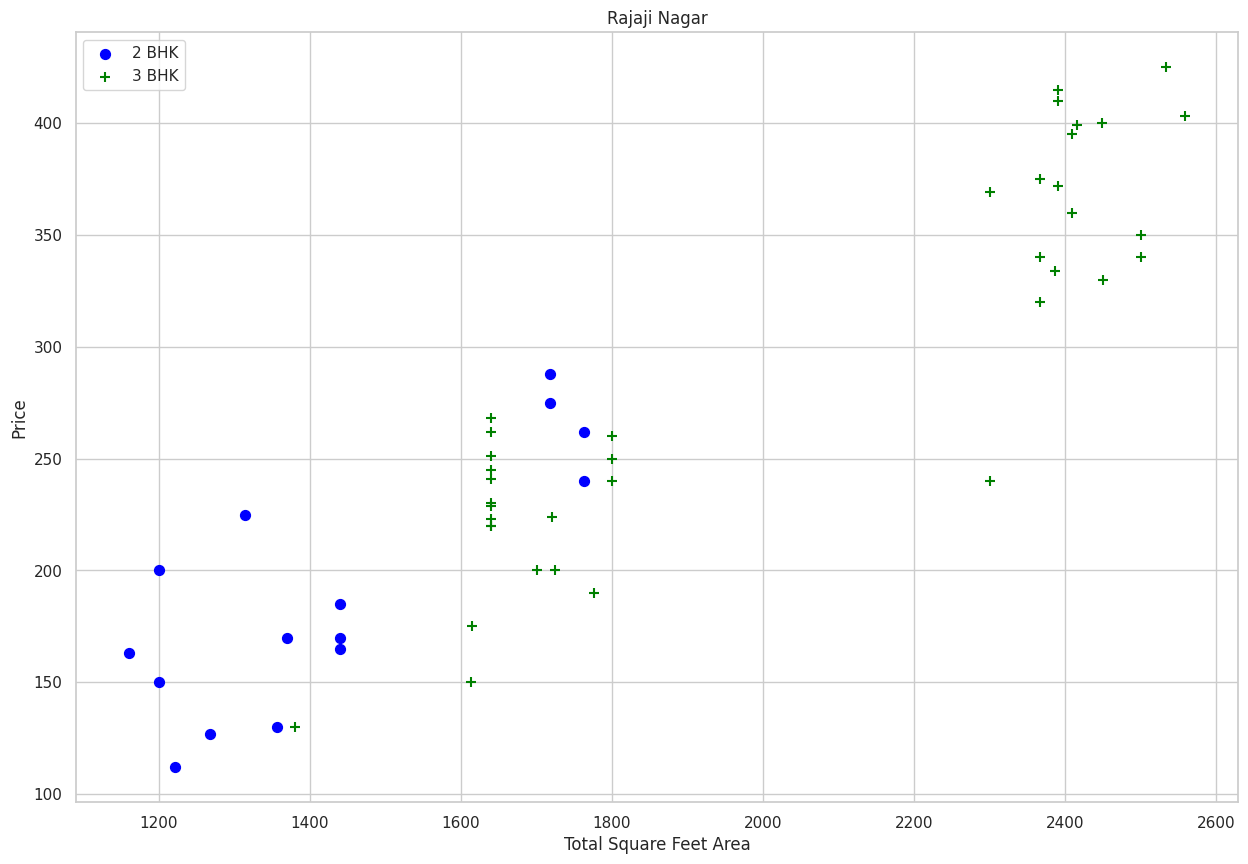

In [ ]:
scatter_plot(df4,'Rajaji Nagar')

*The remove_bhk_outliers function is designed to filter out anomalies in price_per_sqft based on the number of bedrooms (BHK) within each location. It first calculates the mean and standard deviation of price_per_sqft for each BHK category within a location and stores these stats. Then, for each BHK level, it compares its price values against the average of the previous (lower) BHK category. If there are more than 5 entries in the lower BHK group, it flags and excludes entries where the current BHK's price_per_sqft is lower than the average price_per_sqft of the smaller BHK category—assuming such cases are potential data anomalies. The function returns a cleaned DataFrame by dropping these outlier entries, helping improve the quality and reliability of housing price analysis.*

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df5=remove_bhk_outliers(df4)
df5.shape

(7254, 8)

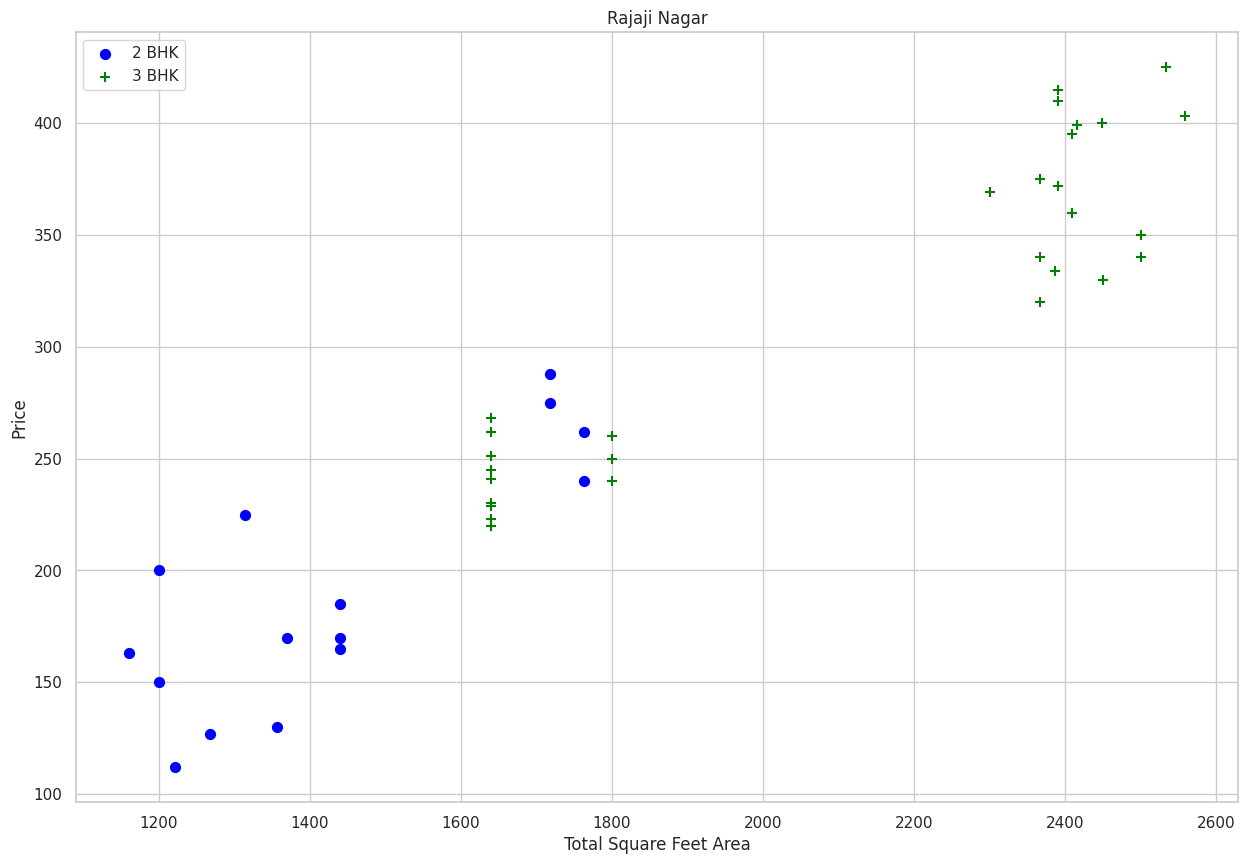

In [ ]:
scatter_plot(df5,'Rajaji Nagar')

In [ ]:
df5[df5.bath>df5.BHK+2]

,availability,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
1624,1,Chikkabanavar,4,2460.0,7,2,80.0,3252.03252
6647,1,Thanisandra,3,1806.0,6,2,116.0,6423.03433


In [ ]:
df5=df5.drop(['price_per_sqft'],axis=1)

In [ ]:
df5.head()

,availability,location,BHK,total_sqft,bath,balcony,price
0,0,1st Block Jayanagar,4,2850.0,4,1,428.0
1,0,1st Block Jayanagar,3,1630.0,3,2,194.0
2,1,1st Block Jayanagar,3,1875.0,2,3,235.0
3,0,1st Block Jayanagar,3,1200.0,2,0,130.0
4,0,1st Block Jayanagar,2,1235.0,2,2,148.0


# EDA AND FEATURE ENGINEERING

<ipython-input-215-264a759fa587>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_bhk, x='BHK', y='price', palette='crest')


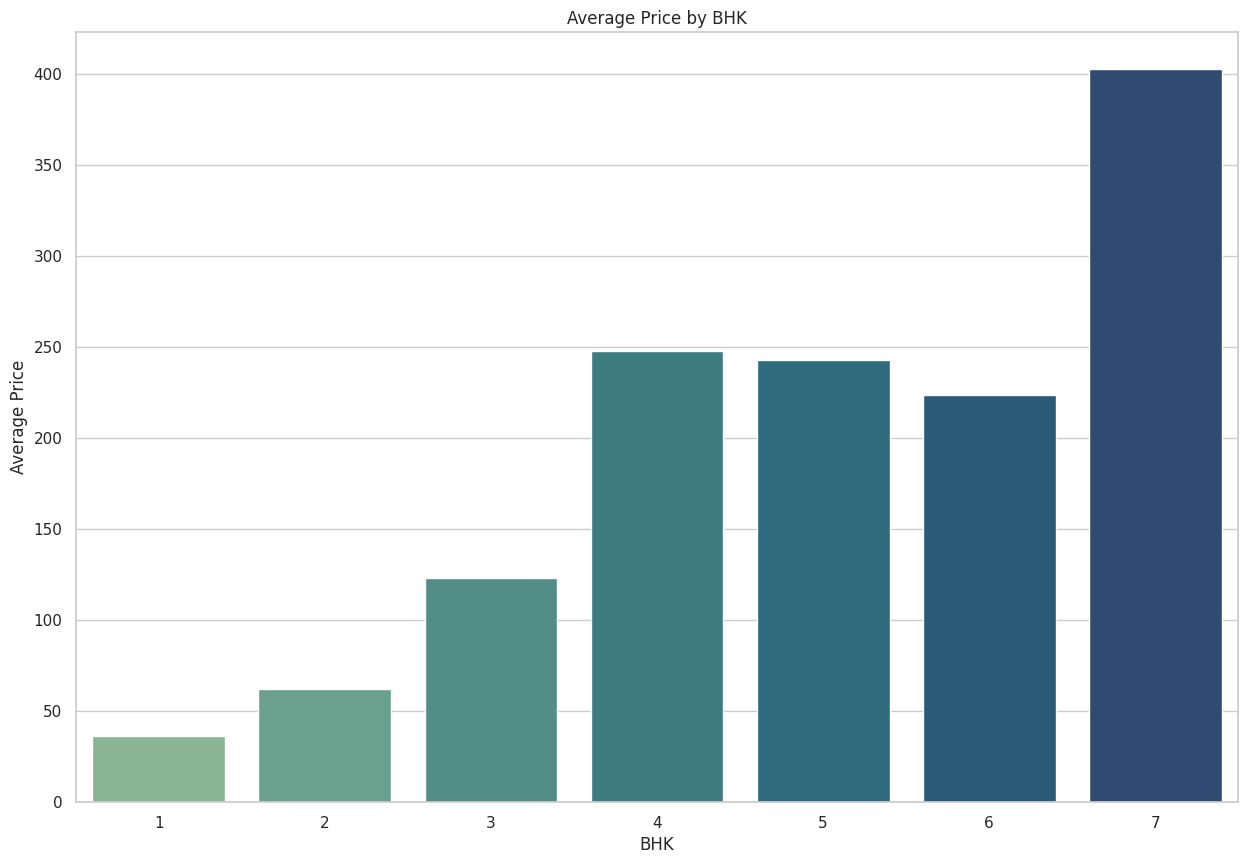

In [ ]:
avg_price_bhk = df5.groupby('BHK')['price'].mean().reset_index()
sns.barplot(data=avg_price_bhk, x='BHK', y='price', palette='crest')
plt.title("Average Price by BHK")
plt.xlabel("BHK")
plt.ylabel("Average Price")
plt.show()


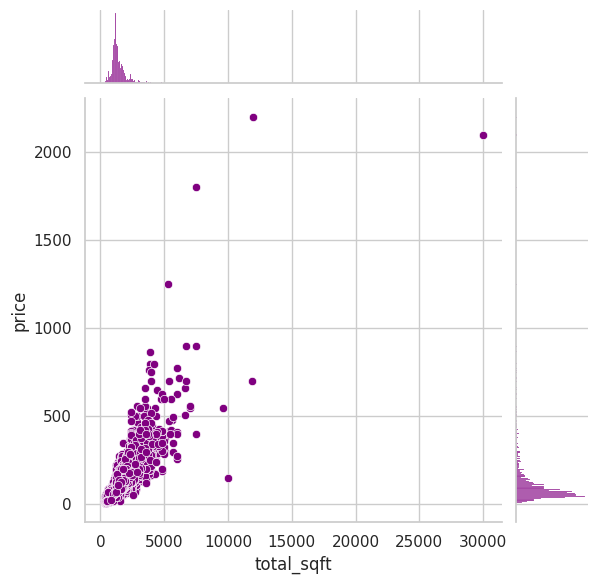

In [ ]:
sns.jointplot(data=df5, x='total_sqft', y='price', kind='scatter', color='purple')
plt.show()


In [ ]:
df5.head()

,availability,location,BHK,total_sqft,bath,balcony,price
0,0,1st Block Jayanagar,4,2850.0,4,1,428.0
1,0,1st Block Jayanagar,3,1630.0,3,2,194.0
2,1,1st Block Jayanagar,3,1875.0,2,3,235.0
3,0,1st Block Jayanagar,3,1200.0,2,0,130.0
4,0,1st Block Jayanagar,2,1235.0,2,2,148.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['BHK', 'total_sqft', 'bath', 'balcony','availability']
scaler = MinMaxScaler()
df5[cols_to_scale] = scaler.fit_transform(df5[cols_to_scale])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df=pd.DataFrame()
  vif_df['column']=data.columns
  vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range (data.shape[1])]
  return vif_df

In [ ]:
calculate_vif(df5[cols_to_scale])

,column,VIF
0,BHK,35.822688
1,total_sqft,8.409605
2,bath,34.512581
3,balcony,4.226144
4,availability,3.949545


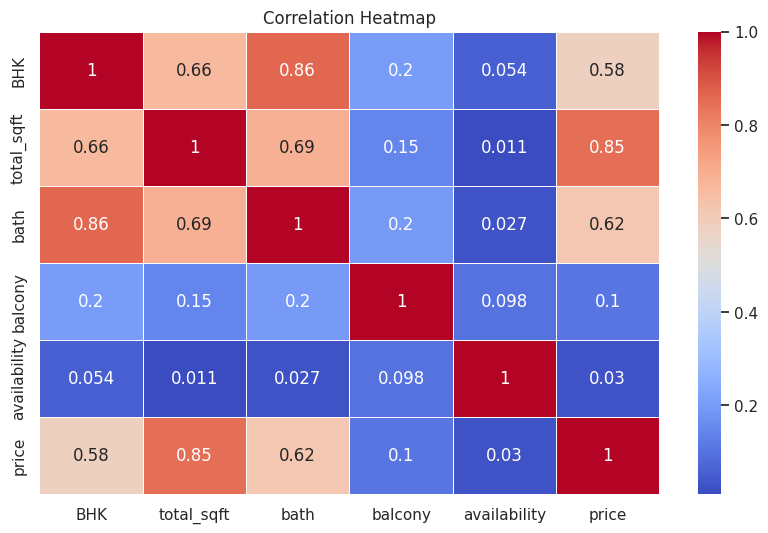

In [ ]:
import seaborn as sns# Select only numerical columns for correlation
corr_matrix = df5[cols_to_scale + ['price']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dummies=pd.get_dummies(df5.location,drop_first=True).astype(int)
dummies.head(3)

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6=df5.copy()

In [ ]:
df6=pd.concat([df6,dummies],axis='columns')

In [ ]:
df6.head()

,availability,location,BHK,total_sqft,bath,balcony,price,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,1st Block Jayanagar,4,2850.0,4,1,428.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1st Block Jayanagar,3,1630.0,3,2,194.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1st Block Jayanagar,3,1875.0,2,3,235.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1st Block Jayanagar,3,1200.0,2,0,130.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1st Block Jayanagar,2,1235.0,2,2,148.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6.shape

(7254, 241)

In [ ]:
df6=df6.drop(['location'],axis='columns')

In [ ]:
df6=df6.drop(['availability'],axis='columns')

In [ ]:
df6.head()

,BHK,total_sqft,bath,balcony,price,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4,1,428.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3,2,194.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2,3,235.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2,0,130.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2,2,148.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6.dtypes

,0
BHK,int64
total_sqft,float64
bath,int64
balcony,int64
price,float64
...,...
Yelahanka,int64
Yelahanka New Town,int64
Yelenahalli,int64
Yeshwanthpur,int64


In [ ]:
# Convert all boolean columns to int type
df6 = df6.astype({col: int for col in df6.select_dtypes(include='bool').columns})

In [ ]:
df6.dtypes

,0
BHK,int64
total_sqft,float64
bath,int64
balcony,int64
price,float64
...,...
Yelahanka,int64
Yelahanka New Town,int64
Yelenahalli,int64
Yeshwanthpur,int64


In [ ]:
df6.shape

(7254, 239)

**TRAIN - TEST SPLIT**

In [ ]:
X = df6.drop('price', axis=1)
y = df6['price']
X_columns = X.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5803, 238), (1451, 238))

# **MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.87751677223733

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2 Score:", r2)

MSE: 952.5568868792783
R^2 Score: 0.87751677223733


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
model_lasso=Lasso(alpha=0.000001)
model_lasso.fit(X_train,y_train)
model_lasso.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.416e+06, tolerance: 4.928e+03
  model = cd_fast.enet_coordinate_descent(


0.8772696641759177

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr=SVR()
model_svr.fit(X_train,y_train)
model_svr.score(X_test,y_test)

0.29023158599211263

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb=XGBRegressor(random_state=42)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test,y_test)

0.9109355853343125

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {model_xgb.score(X_test, y_test):.2f}")


MAE: 14.81
RMSE: 26.32
R² Score: 0.91


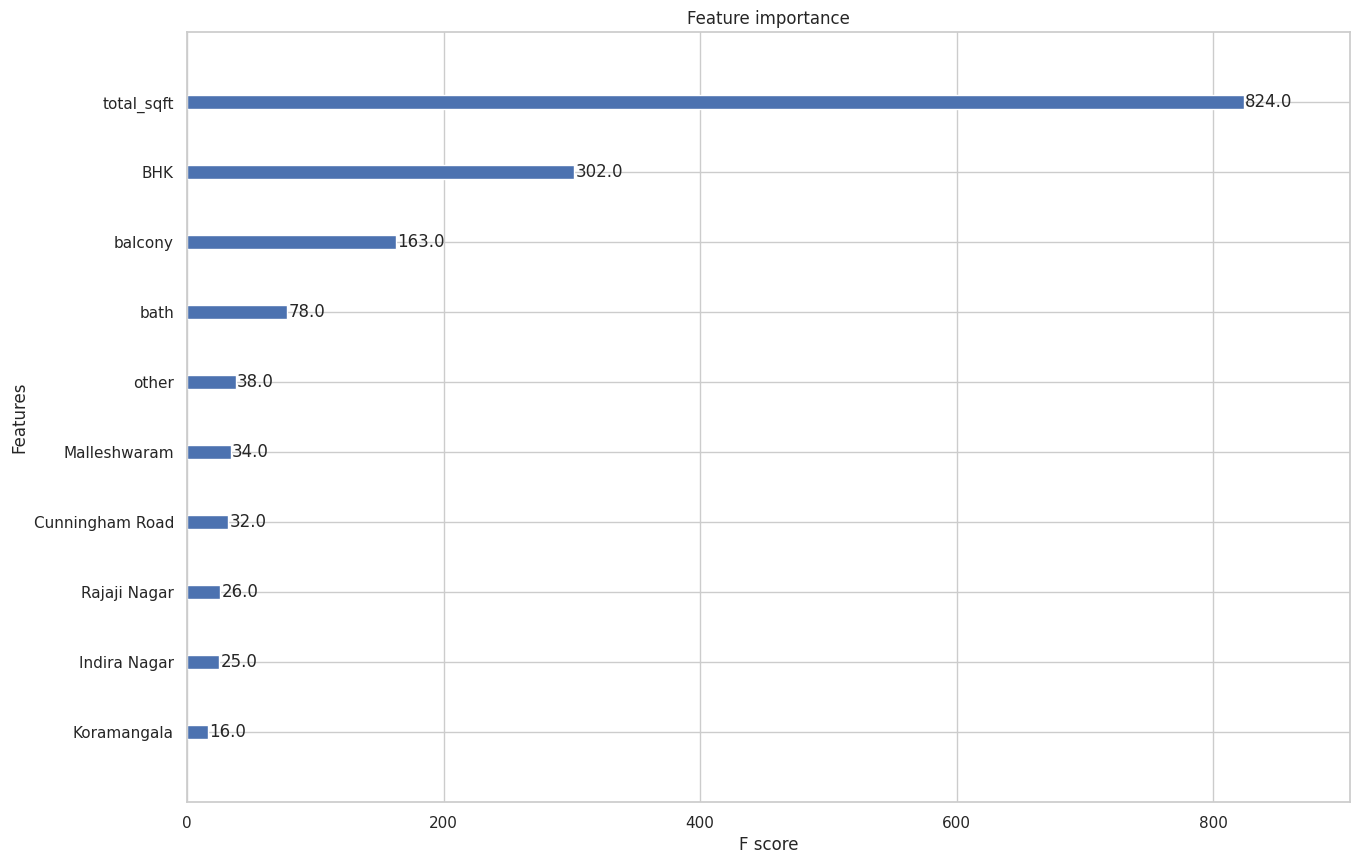

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model_xgb, max_num_features=10)
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
import pandas as pd

def tune_xgb_model_random(X, y, n_iter=50):
    xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'gamma': [0, 1, 5]
    }

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='r2',
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X, y)

    print(f"\n✅ Best R² Score: {random_search.best_score_:.4f}")
    print(f"📊 Best Parameters: {random_search.best_params_}")

    return random_search.best_estimator_


In [ ]:
best_model = tune_xgb_model_random(X, y, n_iter=50)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Best R² Score: 0.7769
📊 Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



Test R² Score: 0.9176
MAE: 16.18
RMSE: 25.31


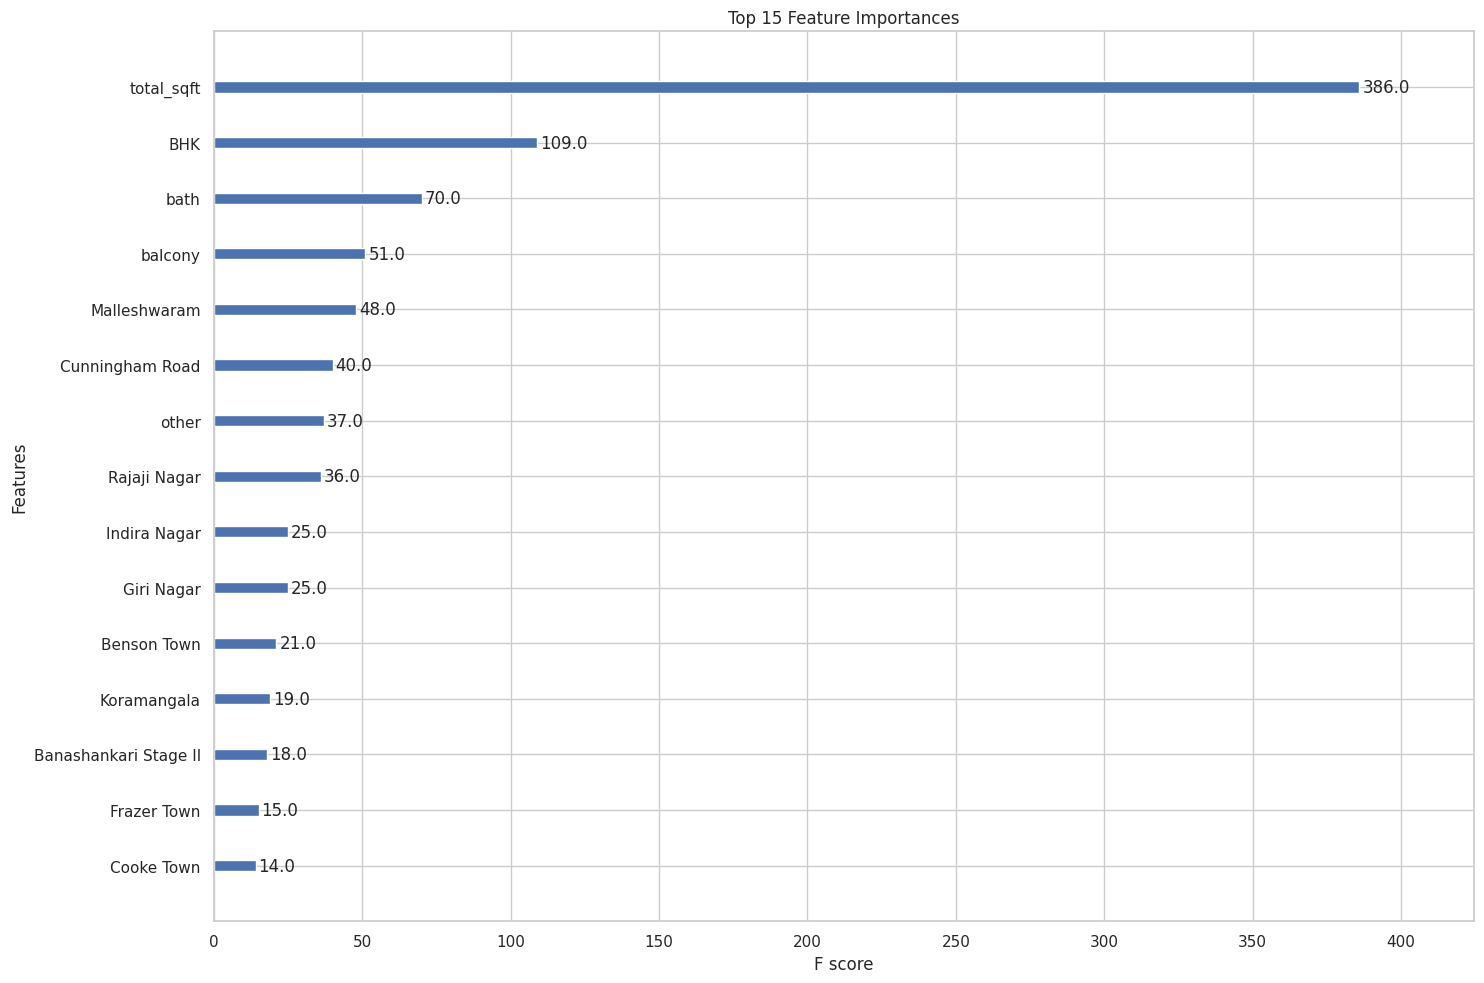

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model, max_num_features=15)
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


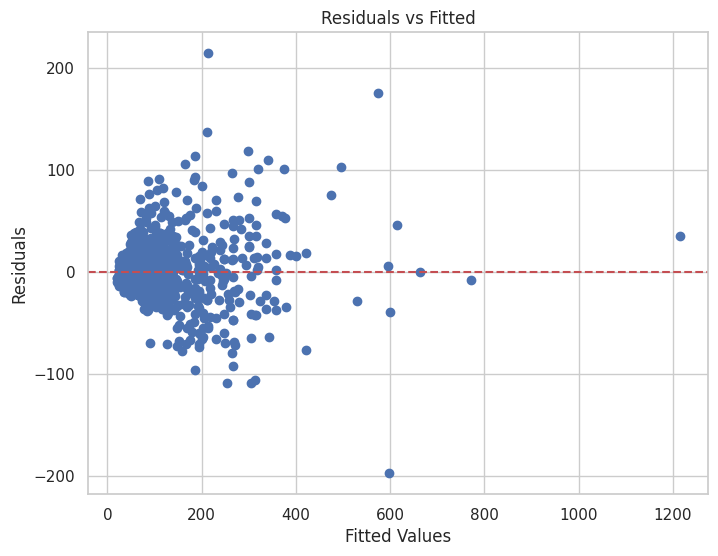

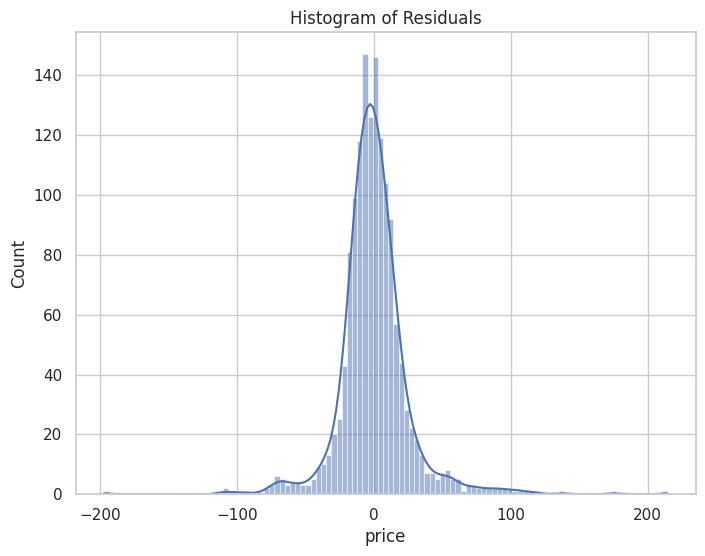

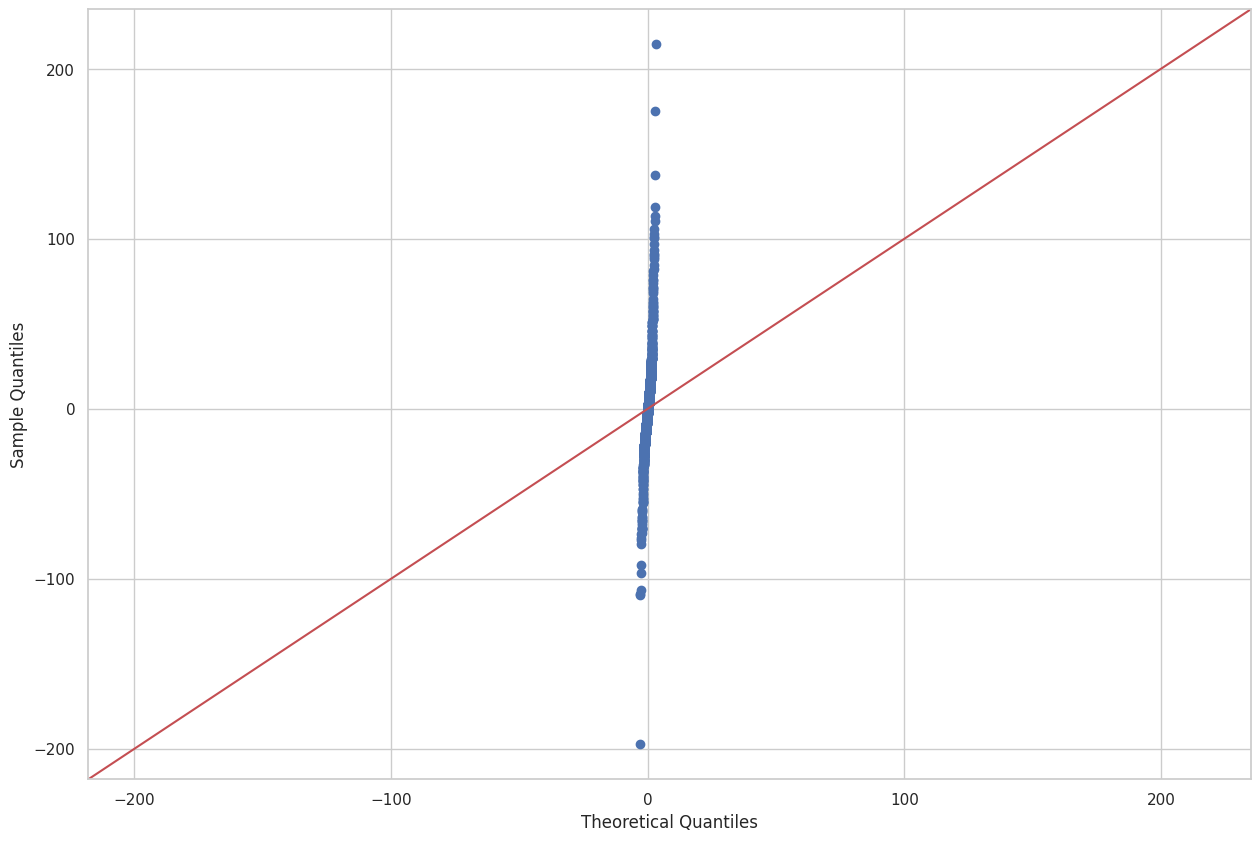

Durbin-Watson Statistic: 2.091347594302373


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Assuming y_actual and y_pred are your actual and predicted values
residuals = y_test - y_pred

# 1. Residual vs Fitted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3. Q-Q Plot
sm.qqplot(residuals, line ='45')
plt.show()

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat}')

1. Residuals vs. Fitted Plot (Residuals vs. Predicted values)
What it shows: This plot shows the relationship between the residuals (errors) and the predicted values from the model.

What to look for:

Random Scattering: If the residuals are randomly scattered around the horizontal line (zero residuals), it indicates that the model has captured the relationship well and there’s no clear pattern.

Non-random Patterns: If you see any discernible patterns, such as curves, waves, or fanning out, it suggests that your model is missing some important relationships (like non-linearity or heteroscedasticity). This would mean the model isn’t fully capturing the data’s structure.

Interpretation:

Good Fit: Residuals should be randomly scattered around zero, indicating no bias in predictions and that the model is correctly specified.

Bad Fit: A curve or systematic pattern indicates potential issues with the model, such as the need for higher-degree polynomials, interactions, or other model adjustments.

Example:

Good: Randomly scattered residuals with no pattern.

Bad: A “U-shape” or funnel shape indicates non-linearity or heteroscedasticity.

2. Histogram of Residuals
What it shows: A histogram of the residuals shows the distribution of the residuals.

What to look for:

Normal Distribution: If the histogram is bell-shaped and symmetric, it suggests that the residuals follow a normal distribution, which is an assumption for many models (especially linear regression).

Skewness: If the histogram is skewed to the left or right, it suggests non-normality in the residuals.

Outliers: Look for any bars far away from the center of the histogram. These outliers could indicate that the model isn’t performing well on those specific data points.

Interpretation:

Good Fit: If the histogram looks roughly normal, your model is likely capturing the data well.

Bad Fit: If the histogram is heavily skewed or has multiple peaks, the model may be misfitting or not accounting for key features of the data (e.g., skewed data or non-normal errors).

3. Q-Q Plot (Quantile-Quantile Plot)
What it shows: A Q-Q plot compares the quantiles of the residuals against the quantiles of a normal distribution.

What to look for:

Straight Line: If the points fall roughly along a straight line, the residuals are normally distributed, which is ideal for many models (such as linear regression).

Curvature: If the points deviate significantly from the straight line (especially at the tails), it suggests that the residuals are not normally distributed. This could point to issues like heavy tails or skewness in the residuals.

Interpretation:

Good Fit: Points following the line indicate that the residuals are normally distributed, which is a good sign.

Bad Fit: Significant deviations from the line suggest that the residuals are not normal, which could affect the validity of statistical tests and predictions.

4. Durbin-Watson Statistic
What it shows: This test checks for autocorrelation in the residuals. Autocorrelation means that residuals are related to each other over time (or observations).

What to look for:

A Durbin-Watson statistic close to 2 suggests no autocorrelation in the residuals.

Values close to 0 suggest positive autocorrelation, and values close to 4 suggest negative autocorrelation.

Interpretation:

Good Fit: A Durbin-Watson statistic close to 2 means there’s no autocorrelation, suggesting that the residuals are independent.

Bad Fit: If the statistic is much lower than 2 or much higher, it suggests that the residuals are not independent, which could indicate a problem with time-dependent data or model misspecification.

5. Shapiro-Wilk Test for Normality
What it shows: This statistical test checks if the residuals follow a normal distribution.

What to look for:

p-value > 0.05: If the p-value is greater than 0.05, you fail to reject the null hypothesis that the residuals are normally distributed, suggesting normality.

p-value < 0.05: If the p-value is less than 0.05, the residuals are not normally distributed, suggesting issues with model assumptions.

Interpretation:

Good Fit: A non-significant p-value (> 0.05) means the residuals are likely normal, which is a good indicator for models assuming normality.

Bad Fit: A significant p-value (< 0.05) indicates that the residuals deviate from normality, which might affect your model's reliability.



Mean Absolute Error (MAE): 16.17744445501074
Mean Squared Error (MSE): 640.5677123687148
Root Mean Squared Error (RMSE): 25.30943919506544
R-Squared: 0.9176334746069468


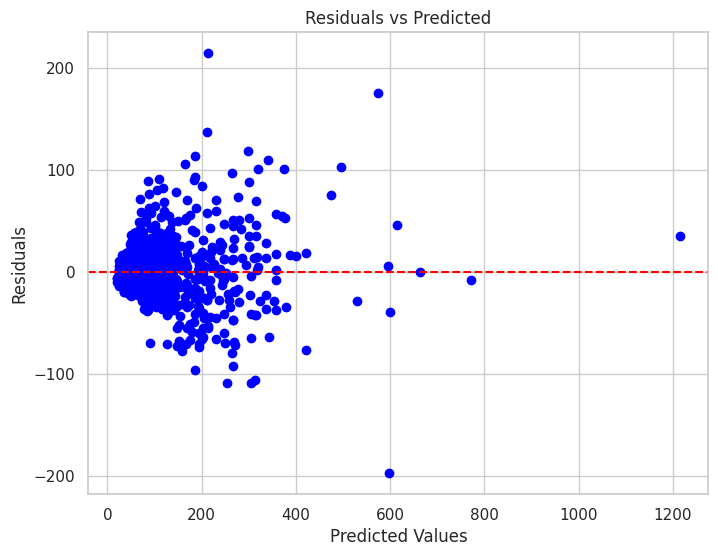

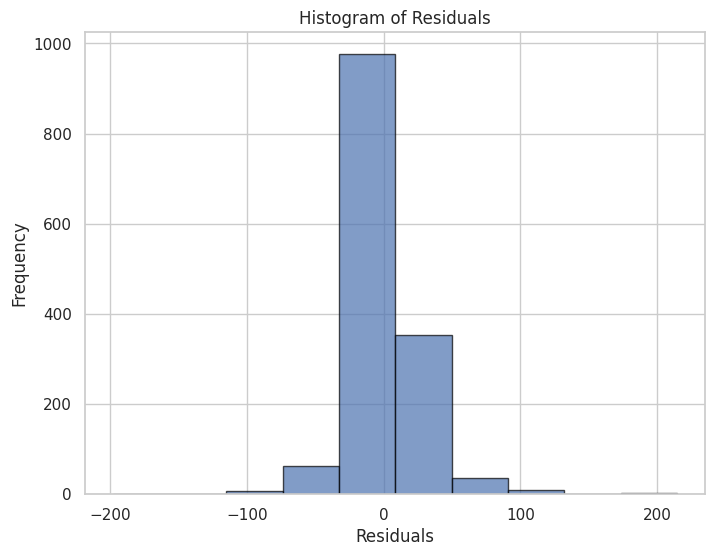

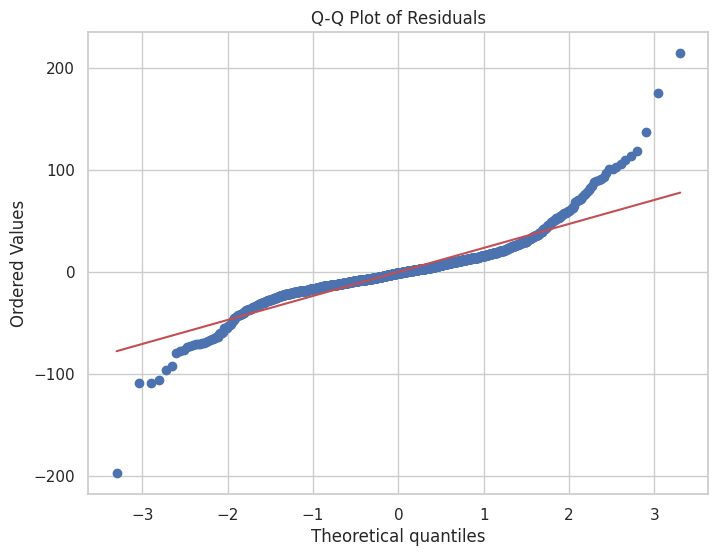

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. Residuals (Difference between y_test and y_pred)
residuals = y_test - y_pred

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 4. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 5. R-Squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

# Print out the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r_squared}")

# 6. Optional: Plot Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 7. Optional: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 8. Optional: Q-Q Plot of Residuals
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Cross-Validation MSE Scores: [0.01053715 0.01529702 0.00743393 0.01233143 0.00725931]
Average Cross-Validation MSE: 0.010571768262346636


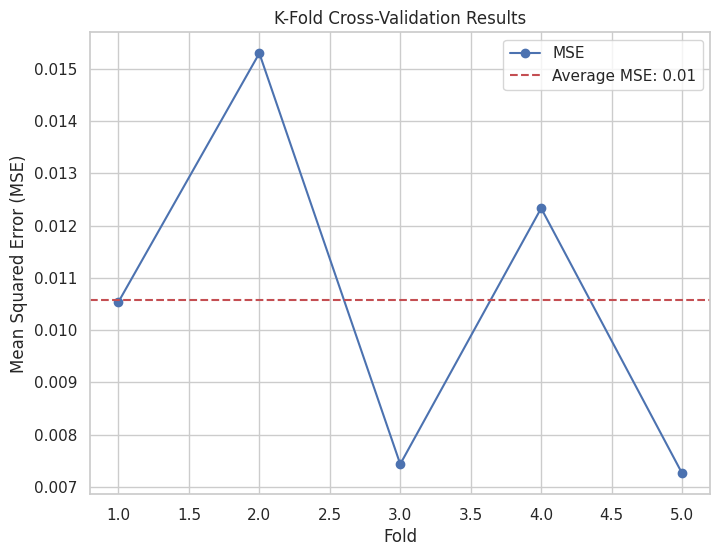

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Example dataset (replace with your own data)
# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Choose a model (Linear Regression or any other model)
model = LinearRegression()

# Perform k-fold cross-validation
# Using 10 folds (you can adjust the number of folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive value
cv_scores = -cv_scores

# Print out cross-validation scores
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average Cross-Validation MSE: {np.mean(cv_scores)}")

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b', label='MSE')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f'Average MSE: {np.mean(cv_scores):.2f}')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


In [ ]:
import pickle

# Save model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)


In [ ]:
# Load model
with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [ ]:
def predict_price(location, sqft, bath, bhk, balcony, model, X_columns):
    # Create a zero-filled vector with same number of features as training data
    x = np.zeros(len(X_columns))

    # Assign values to core features (must match your training feature order)
    x[X_columns.get_loc('total_sqft')] = sqft
    x[X_columns.get_loc('bath')] = bath
    x[X_columns.get_loc('BHK')] = bhk
    x[X_columns.get_loc('balcony')] = balcony

    # Set location one-hot encoding
    if location in X_columns:
        x[X_columns.get_loc(location)] = 1

    # Predict and return
    return model.predict([x])[0]


In [ ]:
# Example: Change only square footage
price1 = predict_price('Whitefield', sqft=1200, bath=2, bhk=3, balcony=1, model=model_xgb, X_columns=X.columns)
price2 = predict_price('Whitefield', sqft=1500, bath=2, bhk=3, balcony=1, model=model_xgb, X_columns=X.columns)
price1, price2

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Example: Change BHK
price3 = predict_price('Whitefield', sqft=1500, bath=2, bhk=2, balcony=1, model=model_xgb, X_columns=X.columns)
price4 = predict_price('Whitefield', sqft=1500, bath=2, bhk=3, balcony=1, model=model_xgb, X_columns=X.columns)
price3, price4

In [ ]:
# Example: Change location
price5 = predict_price('Whitefield', sqft=1500, bath=2, bhk=3, balcony=1, model=model_xgb, X_columns=X.columns)
price6 = predict_price('Yelahanka', sqft=1500, bath=2, bhk=3, balcony=1, model=model_xgb, X_columns=X.columns)

price5,price6

In [ ]:
def predict_price(location, sqft, bath, bhk, balcony, model, X_columns):
    import numpy as np
    x = np.zeros(len(X_columns))  # create input vector
    x[X_columns.get_loc('total_sqft')] = sqft
    x[X_columns.get_loc('bath')] = bath
    x[X_columns.get_loc('BHK')] = bhk
    x[X_columns.get_loc('balcony')] = balcony
    if location in X_columns:
        x[X_columns.get_loc(location)] = 1

    return model.predict([x])[0]


In [ ]:
import pickle
import pandas as pd

# Load model
with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load or define X_columns (used in training)
X_columns = X_columns
# Predict
price = predict_price('Whitefield', 1500, 2, 3, 1, model, X_columns)
print(f"Predicted Price: ₹{price:.2f} Lakhs")


In [ ]:
price = predict_price('st Phase JP Nagar', 1500, 2, 1, 1, model, X_columns)
print(f"Predicted Price: ₹{price:.2f} Lakhs")

In [ ]:
price = predict_price('Indira Nagar', 1500, 3, 3, 1, model, X_columns)
print(f"Predicted Price: ₹{price:.2f} Lakhs")

In [ ]:
price = predict_price('Indira Nagar', 1500, 3, 2, 1, model, X_columns)
print(f"Predicted Price: ₹{price:.2f} Lakhs")

In [ ]:
import pickle

# Let's assume X is your DataFrame of features used in model training
columns_list = X.columns.tolist()

# Save to columns.pkl
with open('columns.pkl', 'wb') as f:
    pickle.dump(columns_list, f)

print("columns.pkl saved successfully!")
